In [ ]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [8]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Set style for better visualizations
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [9]:
dataset_path = "/home/fozle/Course Work/Y1S2/CISC 844/Projects/LLM-Predicate-Logic/dataset/data.csv"
df = pd.read_csv(dataset_path)

In [11]:
# Display the first few rows to understand the data
display(df.head())

# Basic dataset information
print(f"Dataset shape: {df.shape}")

,id,logic,rule_category,rule,problem,query,answer
0,1,propositional,equivalent,De Morgan's laws,contradiction,Consider the following premises: Neither Elisa...,no
1,2,propositional,equivalent,De Morgan's laws,contradiction,Consider the following premises: The claim tha...,no
2,3,propositional,equivalent,De Morgan's laws,contradiction,Consider the following premises: The claim tha...,no
3,4,propositional,equivalent,De Morgan's laws,contradiction,Consider the following premises: Neither it is...,no
4,5,propositional,equivalent,De Morgan's laws,contradiction,Consider the following premises: Neither Willi...,no


Dataset shape: (5200, 7)


Number of distinct rules: 82
Number of distinct rule categories: 3

Top 10 most common rules:
- De Morgan's laws: 75
- Law of quantifier distribution: 75
- Law of quantifier movement: 75
- Law of quantifier negation: 75
- addition: 75
- associative laws: 75
- biconditional introduction: 75
- biconditional elimination: 75
- commutative laws: 75
- biconditional laws: 75


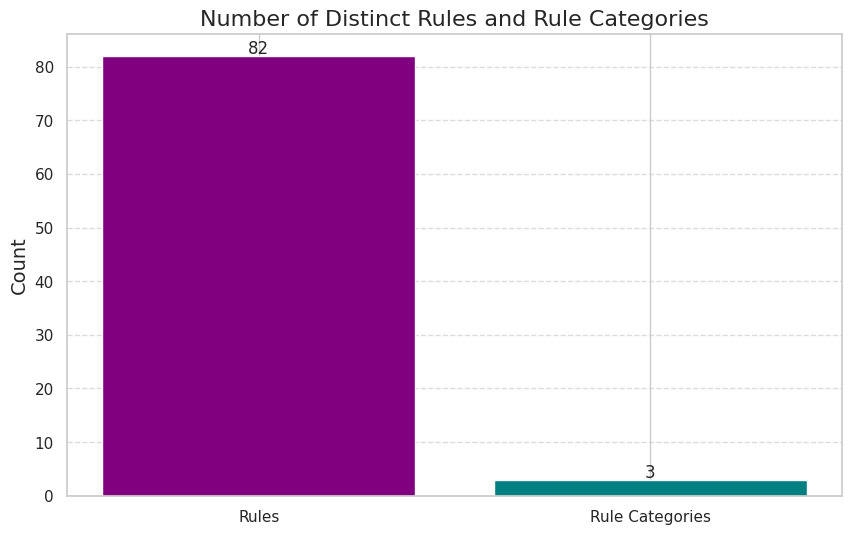

In [14]:
# Display the number of distinct rules in the dataset
unique_rules = df['rule'].nunique()
unique_categories = df['rule_category'].nunique()

# Create a bar chart showing the counts
plt.figure(figsize=(10, 6))
bars = plt.bar(['Rules', 'Rule Categories'], [unique_rules, unique_categories], color=['purple', 'teal'])

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height}', ha='center', fontsize=12)

plt.title('Number of Distinct Rules and Rule Categories', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Print numerical results
print(f"Number of distinct rules: {unique_rules}")
print(f"Number of distinct rule categories: {unique_categories}")

# Display top 10 most common rules and their counts
print("\nTop 10 most common rules:")
top_rules = df['rule'].value_counts().head(10)
for rule, count in top_rules.items():
    print(f"- {rule}: {count}")

Distribution of logical types

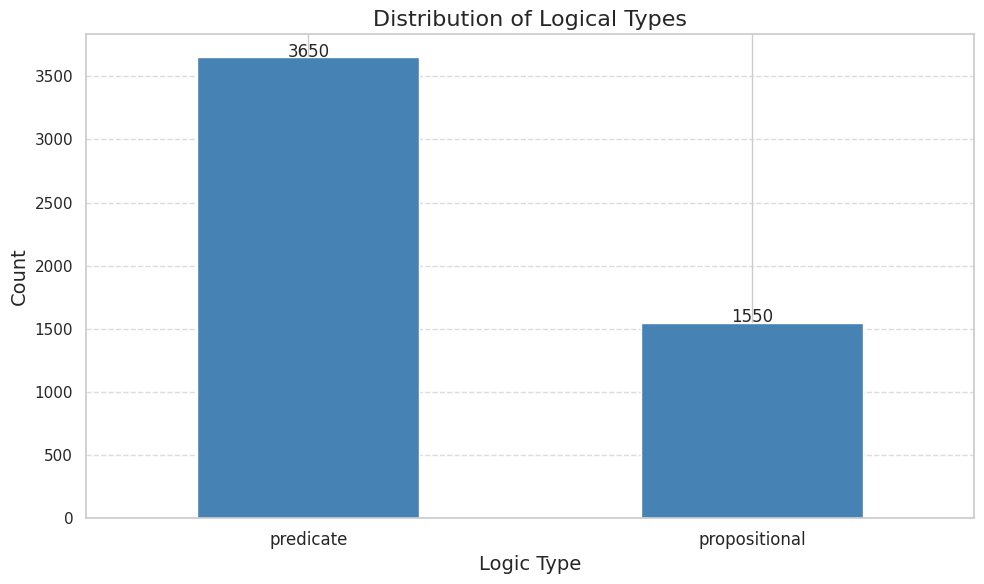

Percentage distribution of logical types:
predicate: 70.19%
propositional: 29.81%


In [5]:

logic_counts = df['logic'].value_counts()

plt.figure(figsize=(10, 6))
ax = logic_counts.plot(kind='bar', color='steelblue')
plt.title('Distribution of Logical Types', fontsize=16)
plt.xlabel('Logic Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of bars
for i, count in enumerate(logic_counts):
    ax.text(i, count + 5, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Display percentage distribution
logic_percentage = logic_counts / len(df) * 100
print("Percentage distribution of logical types:")
for logic_type, percentage in logic_percentage.items():
    print(f"{logic_type}: {percentage:.2f}%")

Distribution of rule categories

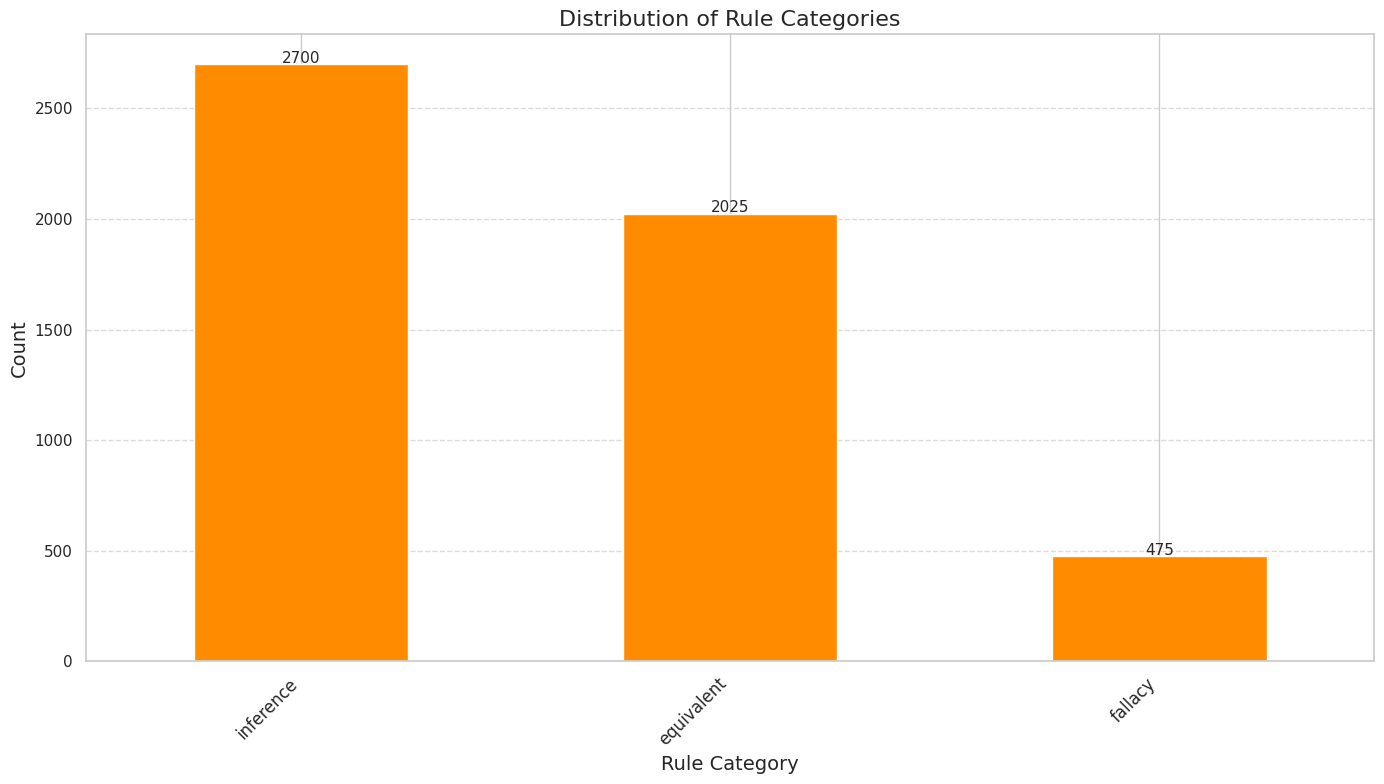

In [6]:

rule_category_counts = df['rule_category'].value_counts()

plt.figure(figsize=(14, 8))
ax = rule_category_counts.plot(kind='bar', color='darkorange')
plt.title('Distribution of Rule Categories', fontsize=16)
plt.xlabel('Rule Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of bars
for i, count in enumerate(rule_category_counts):
    ax.text(i, count + 5, str(count), ha='center', fontsize=11)

plt.tight_layout()
plt.show()

Distribution of specific rules

In [ ]:
rule_counts = df['rule'].value_counts().head(15)  # Top 15 rules

plt.figure(figsize=(16, 8))
ax = rule_counts.plot(kind='barh', color='forestgreen')
plt.title('Top 15 Most Common Rules', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Rule', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add count labels on bars
for i, count in enumerate(rule_counts):
    ax.text(count + 2, i, str(count), va='center', fontsize=11)

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

Distribution of answers (yes/no)

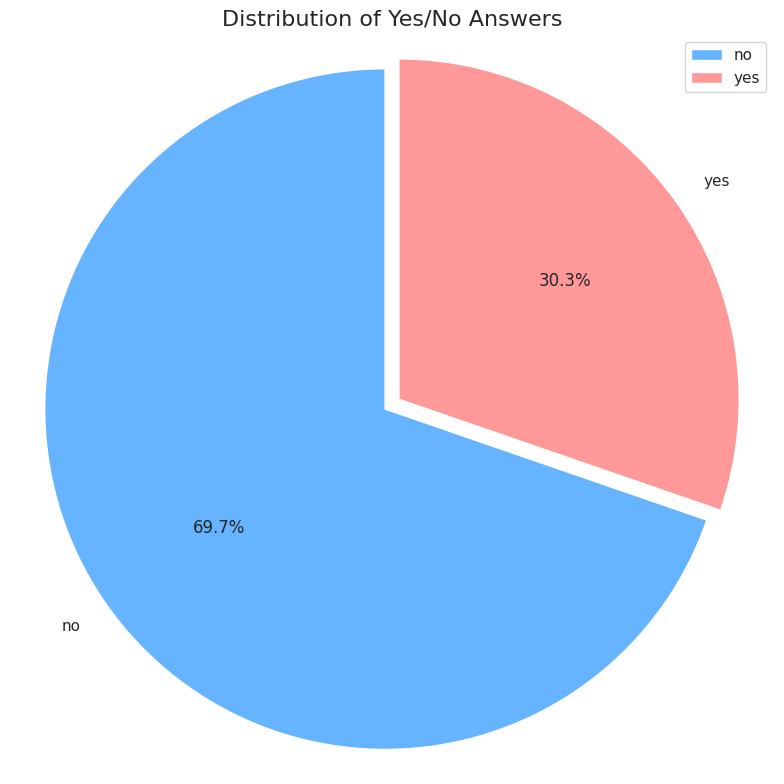

Yes answers: 1575 (30.29%)
No answers: 3625 (69.71%)


In [ ]:

answer_counts = df['answer'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(answer_counts, labels=answer_counts.index, autopct='%1.1f%%', 
        colors=['#66b3ff', '#ff9999'], startangle=90, explode=(0.05, 0))
plt.title('Distribution of Yes/No Answers', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(answer_counts.index, loc="best")
plt.tight_layout()
plt.show()

print(f"Yes answers: {answer_counts.get('yes', 0)} ({answer_counts.get('yes', 0)/len(df)*100:.2f}%)")
print(f"No answers: {answer_counts.get('no', 0)} ({answer_counts.get('no', 0)/len(df)*100:.2f}%)")

Relationship between logic type and rule category

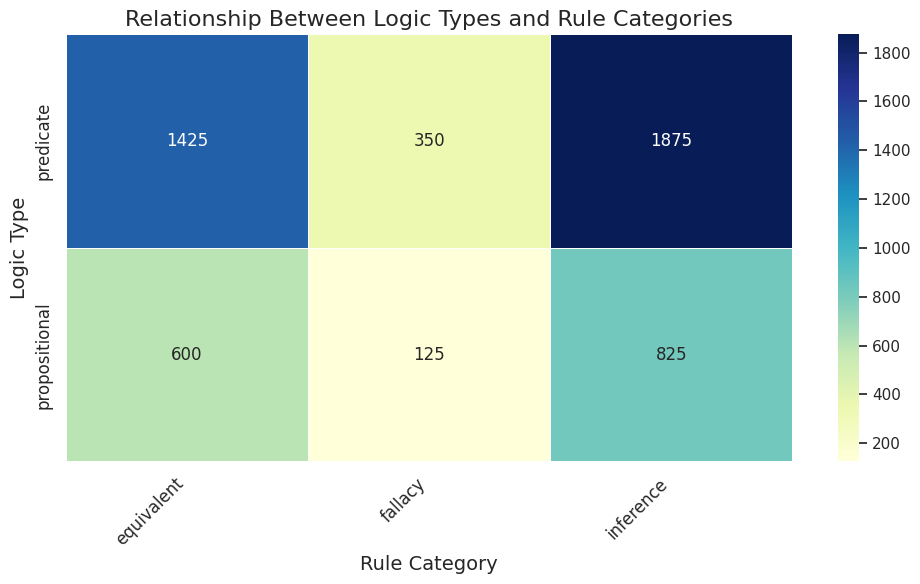

In [14]:
# Cell 7: Relationship between logic type and rule category
logic_rule_cross = pd.crosstab(df['logic'], df['rule_category'])

plt.figure(figsize=(10, 6))
sns.heatmap(logic_rule_cross, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Relationship Between Logic Types and Rule Categories', fontsize=16)
plt.xlabel('Rule Category', fontsize=14)
plt.ylabel('Logic Type', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Visualize answer distribution by logic type

<Figure size 1000x600 with 0 Axes>

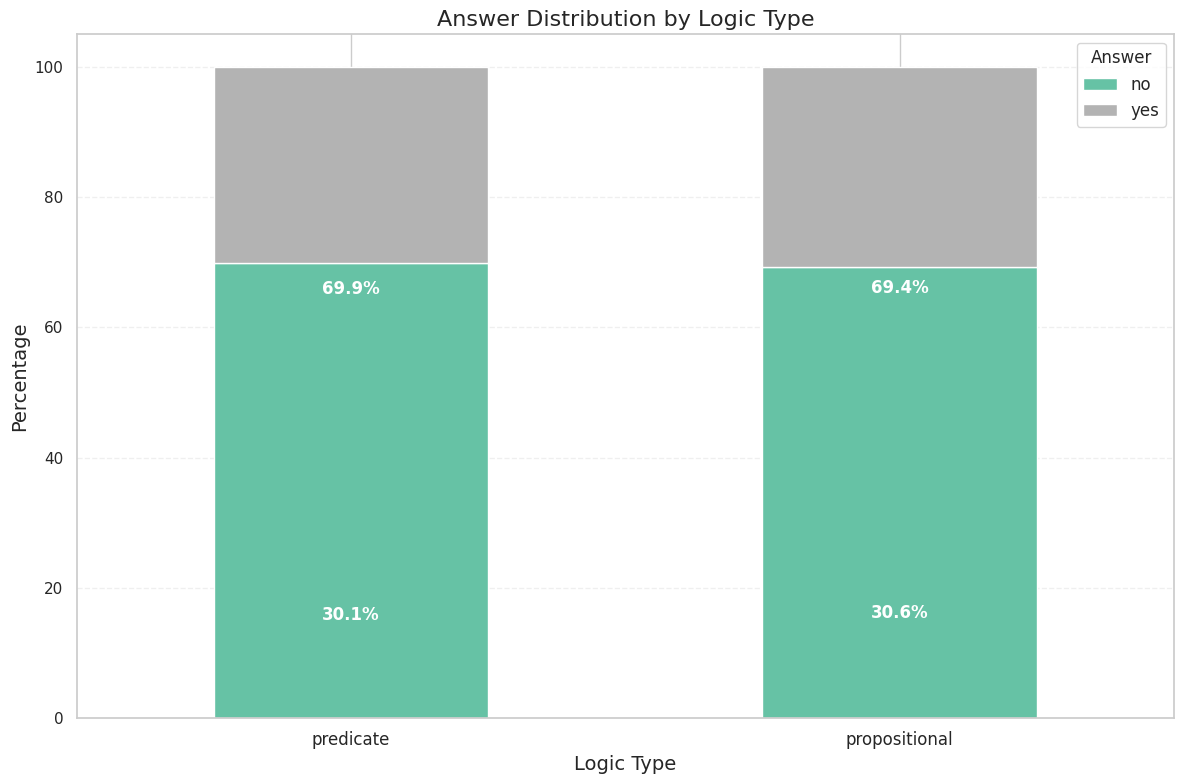

In [15]:
answer_logic_cross = pd.crosstab(df['logic'], df['answer'], normalize='index') * 100

plt.figure(figsize=(10, 6))
answer_logic_cross.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Answer Distribution by Logic Type', fontsize=16)
plt.xlabel('Logic Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Answer', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add percentage labels
for i, logic_type in enumerate(answer_logic_cross.index):
    yes_pct = answer_logic_cross.loc[logic_type, 'yes']
    no_pct = answer_logic_cross.loc[logic_type, 'no']
    plt.text(i, yes_pct/2, f"{yes_pct:.1f}%", ha='center', color='white', fontweight='bold')
    plt.text(i, yes_pct + no_pct/2, f"{no_pct:.1f}%", ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

 Visualize answer distribution by rule category

<Figure size 1400x800 with 0 Axes>

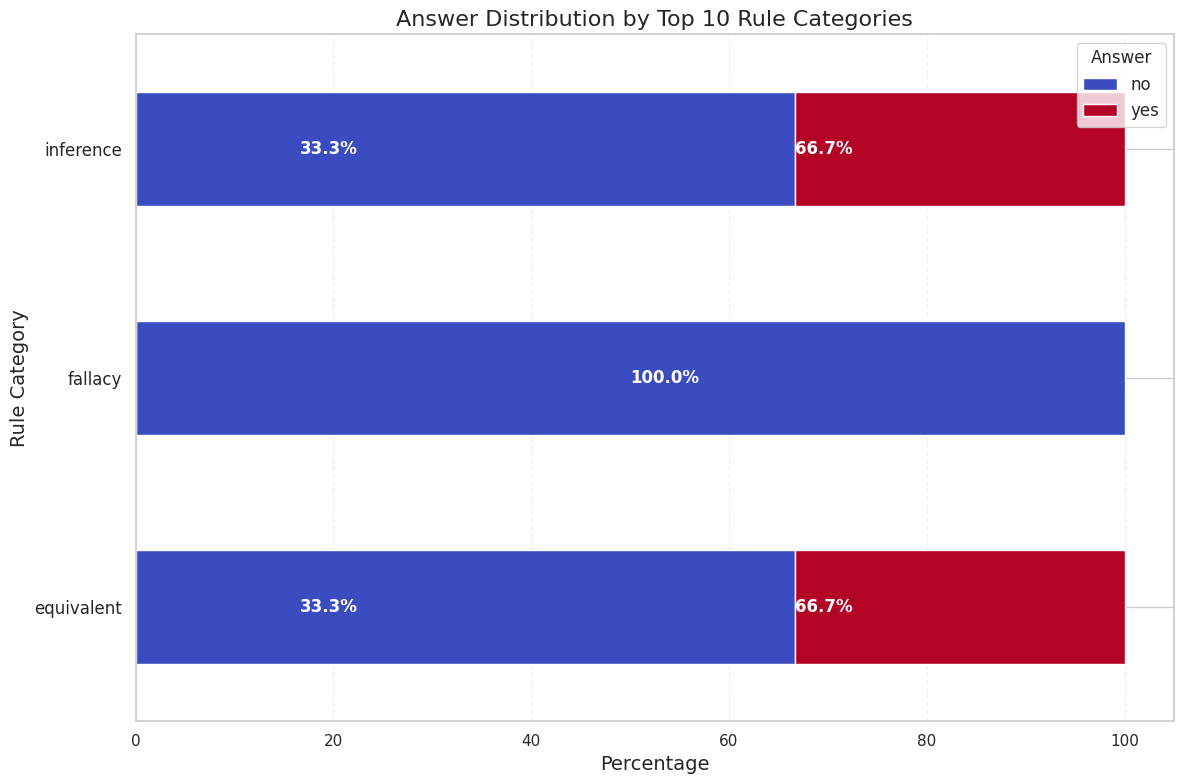

In [18]:
# Focus on top 10 categories for readability
top_categories = df['rule_category'].value_counts().head(10).index
df_top_categories = df[df['rule_category'].isin(top_categories)]

answer_category_cross = pd.crosstab(df_top_categories['rule_category'], 
                                    df_top_categories['answer'], 
                                    normalize='index') * 100

plt.figure(figsize=(14, 8))
answer_category_cross.plot(kind='barh', stacked=True, colormap='coolwarm')
plt.title('Answer Distribution by Top 10 Rule Categories', fontsize=16)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Rule Category', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(title='Answer', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Add percentage labels
for i, category in enumerate(answer_category_cross.index):
    yes_pct = answer_category_cross.loc[category, 'yes'] if 'yes' in answer_category_cross.columns else 0
    no_pct = answer_category_cross.loc[category, 'no'] if 'no' in answer_category_cross.columns else 0
    
    if yes_pct > 10:  # Only show label if there's enough space
        plt.text(yes_pct/2, i, f"{yes_pct:.1f}%", va='center', color='white', fontweight='bold')
    
    if no_pct > 10:
        plt.text(yes_pct + no_pct/2, i, f"{no_pct:.1f}%", va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

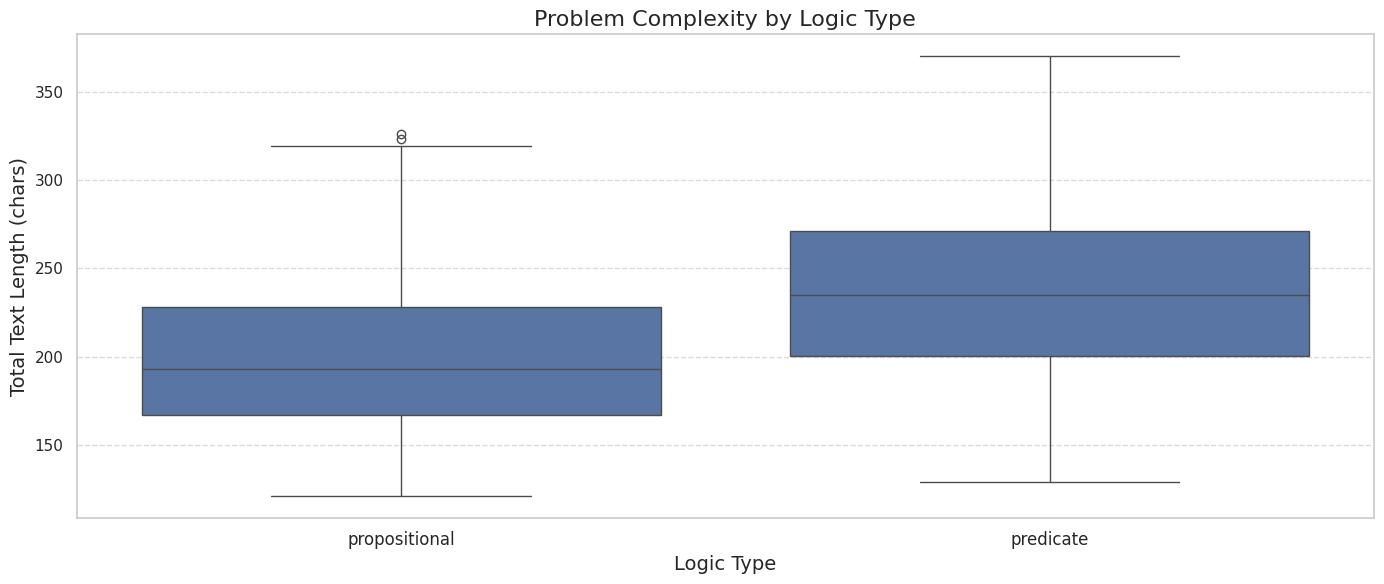

In [19]:
# Cell 11: Problem complexity analysis (based on text length)
df['problem_length'] = df['problem'].str.len()
df['query_length'] = df['query'].str.len()
df['total_length'] = df['problem_length'] + df['query_length']

plt.figure(figsize=(14, 6))
sns.boxplot(x='logic', y='total_length', data=df)
plt.title('Problem Complexity by Logic Type', fontsize=16)
plt.xlabel('Logic Type', fontsize=14)
plt.ylabel('Total Text Length (chars)', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()